<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/RO/cvicenia/notebooky/cv07_en_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 7 - Feature Selection and Normalization, Naive Bayes Classifier, Numerical vs Categorical Data

In the lecture we mainly discussed the Bayes classifier, but in the lab we will focus on some elements of work from earlier lectures. We will cover some methods of features selection and normalization and some transformations of data from categorical type to a numeric version.

## Feature Selection

We can easily perform feature selection using scikit-learn. We will work with a database of wines and their respective qualities for simplicity.

We can use the `sklearn.feature_selection.SelectKBest` to perform filter-type approach to feature selection. We will also need to select a measure such as `chi2, f_classif, mutual_info_classif` to evaluate the individual features.

In [ ]:
from sklearn.datasets import load_wine
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
X, y = load_wine(return_X_y=True)
bunch = load_wine()
print("Loaded wine dataset with features: ", bunch.feature_names, " and classes: ", bunch.target_names)
print(X.shape)
print("First vector")
print(X[0, :])

for stat in (chi2, f_classif, mutual_info_classif):
  print("Using stat: ", stat)
  X_new = SelectKBest(stat, k=8).fit_transform(X, y)
  print(X_new.shape)
  print(X_new[0, :])

Loaded wine dataset with features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']  and classes:  ['class_0' 'class_1' 'class_2']
(178, 13)
First vector
[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
Using stat:  <function chi2 at 0x7f34d9a2f8c0>
(178, 8)
[   1.71   15.6   127.      2.8     3.06    5.64    3.92 1065.  ]
Using stat:  <function f_classif at 0x7f34d9a2f320>
(178, 8)
[1.423e+01 1.710e+00 2.800e+00 3.060e+00 5.640e+00 1.040e+00 3.920e+00
 1.065e+03]
Using stat:  <function mutual_info_classif at 0x7f34d9375680>
(178, 8)
[1.423e+01 2.800e+00 3.060e+00 2.290e+00 5.640e+00 1.040e+00 3.920e+00
 1.065e+03]


### Exercise - Which features were used

Modify the code above so that it also outputs the names of the features which were kept. Check the documentation on how to do this.

In [ ]:
X, y = load_wine(return_X_y=True)
# we the dataset in a different way to have access to feature and target names
bunch = load_wine()
print("Loaded wine dataset with features: ", bunch.feature_names, " and classes: ", bunch.target_names)
print(X.shape)
print("First vector")
print(X[0, :])

for stat in (chi2, f_classif, mutual_info_classif):
  print("Using stat: ", stat)
  selector = SelectKBest(stat, k=8)
  X_new = selector.fit_transform(X, y)
  print("Features kept: ", selector.get_feature_names_out(bunch.feature_names))
  print(X_new.shape)
  print(X_new[0, :])


Loaded wine dataset with features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']  and classes:  ['class_0' 'class_1' 'class_2']
(178, 13)
First vector
[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
Using stat:  <function chi2 at 0x7f34d9a2f8c0>
Features kept:  ['malic_acid' 'alcalinity_of_ash' 'magnesium' 'total_phenols' 'flavanoids'
 'color_intensity' 'od280/od315_of_diluted_wines' 'proline']
(178, 8)
[   1.71   15.6   127.      2.8     3.06    5.64    3.92 1065.  ]
Using stat:  <function f_classif at 0x7f34d9a2f320>
Features kept:  ['alcohol' 'malic_acid' 'total_phenols' 'flavanoids' 'color_intensity'
 'hue' 'od280/od315_of_diluted_wines' 'proline']
(178, 8)
[1.423e+01 1.710e+00 2.800e+00 3.060e+00 5.640e+00 1.040e+00 3.920e+00
 1.065e+0

### Exercise - Wrapper

Now you should try to use the wrapper approach by checking out the `sklearn.feature_selection.SequentialFeatureSelector`. Try to get 10 features by using an SVM classifier.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVC

svc = SVC()

sfs_forward = SequentialFeatureSelector(svc, n_features_to_select=10, direction="forward").fit(X, y)
print("Features kept going forward:", sfs_forward.get_feature_names_out(bunch.feature_names))

sfs_backward = SequentialFeatureSelector(svc, n_features_to_select=10, direction="backward").fit(X, y)
print("Features kept going backward:", sfs_backward.get_feature_names_out(bunch.feature_names))

Features kept going forward: ['alcohol' 'malic_acid' 'ash' 'total_phenols' 'flavanoids'
 'nonflavanoid_phenols' 'proanthocyanins' 'color_intensity' 'hue'
 'od280/od315_of_diluted_wines']
Features kept going backward: ['alcalinity_of_ash' 'magnesium' 'total_phenols' 'flavanoids'
 'nonflavanoid_phenols' 'proanthocyanins' 'color_intensity' 'hue'
 'od280/od315_of_diluted_wines' 'proline']


## Feature normalization and Bayes classifier

We can use the naive Gaussian Bayes classifier from sklearn as `sklearn.naive_bayes.GaussianNB`. We can try it on the wine dataset.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import numpy as np

X, y = load_wine(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_test_pred = gnb.predict(X_test)

print('Accuracy: ', np.sum(y_test_pred == y_test)/len(y_test))

Accuracy:  0.9166666666666666


### Exercise - Importance of feature normalization

Now lets use the same classifier, but before it we will apply PCA. First try to only do PCA on the unchanged data and reduce the dimensionality to 2. Check the accuracy. We will see that the accuracy will be way worse 😞

However, if we first normalize the data and then apply PCA we will achieve better accuracy accuracy. You can normalize the data using `sklearn.preprocessing.StandardScaler`.

Try both of these methods. Since we transform to 2 dimensions you can also visualize the results.

*Note:* This exercise was inspired by [this sklearn example](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#). Do not check before working on this as the solution to this exercise is written there directly in the code.

Accuracy of PCA without normalization:  0.7777777777777778


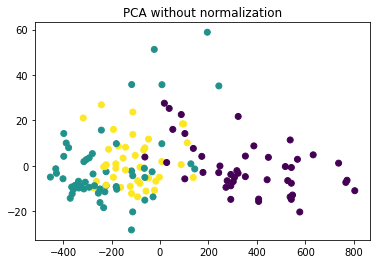

Accuracy of PCA with normalization:  0.9722222222222222


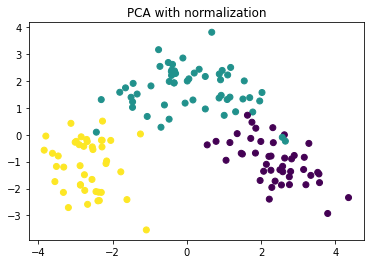

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

pca = PCA(2)
gnb = GaussianNB()

X_train_transformed = pca.fit_transform(X_train)
gnb.fit(X_train_transformed, y_train)
y_test_pred = gnb.predict(pca.transform(X_test))

print('Accuracy of PCA without normalization: ', np.sum(y_test_pred == y_test)/ len(y_test))


plt.scatter(X_train_transformed[:, 0], X_train_transformed[:, 1], c=y_train)
plt.title("PCA without normalization")
plt.show()


scaler = StandardScaler()
pca = PCA(2)
gnb = GaussianNB()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_transformed = pca.fit_transform(X_train_scaled)
gnb.fit(X_train_scaled_transformed, y_train)
y_test_pred = gnb.predict(pca.transform(scaler.transform(X_test)))

print('Accuracy of PCA with normalization: ', np.sum(y_test_pred == y_test)/ len(y_test))

plt.scatter(X_train_scaled_transformed[:, 0], X_train_scaled_transformed[:, 1], c=y_train)
plt.title("PCA with normalization")
plt.show()


### Gaussian classifier decision boundary

We can plot the boundaries using the function from the previous lab.

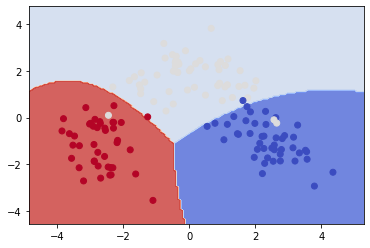

In [ ]:
def plot_clf_boundary(clf, x, y): 
  x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
  y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
  h_x = (x_max - x_min) / 150
  h_y = (y_max - y_min) / 150
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h_x), np.arange(y_min, y_max, h_y))
  z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  z = z.reshape(xx.shape)
  plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.8)

  # Plot also the training points
  plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  # plt.xticks(())
  # plt.yticks(())
  plt.show()

plot_clf_boundary(gnb, X_train_scaled_transformed, y_train)

### Exercise - Sklearn Pipelines

Sometimes we group together multiple operations into one by using from `sklearn.pipeline.make_pipeline`.

Rewrite the code in the block below using the pipeline.

In [ ]:
selector = SelectKBest(f_classif, k=8)
scaler = StandardScaler()
pca = PCA(6)
gnb = GaussianNB()

X_train_selected = selector.fit_transform(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_train_selected)
X_train_transformed = pca.fit_transform(X_train_scaled)
gnb.fit(X_train_transformed, y_train)

y_pred = gnb.predict(pca.transform(scaler.transform(selector.transform(X_test))))
print("Accuracy with feature selection, normalization and PCA: ", np.sum(y_pred == y_test) / len(y_test))

Accuracy with feature selection, normalization and PCA:  1.0


In [ ]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(SelectKBest(f_classif, k=8), StandardScaler(), PCA(6), GaussianNB())

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Accuracy with feature selection, normalization and PCA: ", np.sum(y_pred == y_test) / len(y_test))



Accuracy with feature selection, normalization and PCA:  1.0


## Categorical Naive Bayes Classifier

Now we will work with the Bayes classifier, but we will work with categorical data.

We will load a database of cars.

In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data

import pandas as pd

car_data = pd.read_csv('car.data', names=['buying','maint','doors','persons','lug_boot','safety','class'], sep=",")
print(car_data.head())
print(55 * '*')
print(car_data.describe())

--2022-03-26 17:11:37--  http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51867 (51K) [application/x-httpd-php]
Saving to: ‘car.data.7’

car.data.7          100%[===================>]  50.65K  --.-KB/s    in 0.1s    

2022-03-26 17:11:37 (370 KB/s) - ‘car.data.7’ saved [51867/51867]

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
*******************************************************
       buying  maint doors persons lug_boot safety  class
count    1728   1728  1728    1728     1728   17

### Exercise - Categorical Naive Bayes

We cannot use the categorical naive bayes directly. We have to first convert the data to the appropriate format where each contains contains only integers 0 to $n_{categories} - 1$ representing the various categories with given integers.

In order to do that we can use the `sklearn.preprocessing.LabelEncoder` on the target classes and `sklearn.preprocessing.OrdinalEncoder`. 


*Note:* `LabelEncoder` and `OrdinalEncoder` do essentially the same thing, but the former only works on data with shape (n_samples) and the latter works on data of shape (n_samples, n_features). You could use `LabelEncoder` only, but you would need to apply the transform column by column. To do this you could use the method `apply` of the pandas `DataFrame` class. It applies a given function to every column.



In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

data_X = car_data.drop('class', axis='columns')
data_y = car_data['class']

oe = OrdinalEncoder()
X = oe.fit_transform(data_X)

le = LabelEncoder()
y = le.fit_transform(data_y)


print(X[:5, :])
print(y[:5])


[[3. 3. 0. 0. 2. 1.]
 [3. 3. 0. 0. 2. 2.]
 [3. 3. 0. 0. 2. 0.]
 [3. 3. 0. 0. 1. 1.]
 [3. 3. 0. 0. 1. 2.]]
[2 2 2 2 2]


Now you can train the `sklearn.naive_bayes.CategoricalNB`.

In [ ]:
from sklearn.naive_bayes import CategoricalNB

# there is a weird behavior if we select random_state = 0 one of the categories will not be present in the training set, but only in the test set
# therefore I just found a different random state where this does not happen, otherwise you might get an error
# you can read more at https://github.com/scikit-learn/scikit-learn/issues/16028
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

cnb = CategoricalNB()
cnb.fit(X_train, y_train)

y_pred = cnb.predict(X_test)

print('Categorical NB accuracy: ', np.sum(y_pred == y_test) / len(y_test))

Categorical NB accuracy:  0.8757225433526011


## Converting data from categorical to numeric

So far we have mostly worked with numerical data, but what if we have categorical data? We can transform them using different approaches. In case the categorical data has a direct numerical representation e.g. grades A,B,C,D,E,Fx can be converted to integers. We can manually make the change.

However, in other cases such as categories: dog, cat and hamster. Assigning them values 0, 1 and 2 would not make sense as that would also mean that in our representation a cat is an average of a dog and a hamster, which is not meaningful for most purposes. 

Instead, we can use one-hot encoding. Which creates new features. One for each category and the values will only be 0 and 1. 1 will be used when the given category is the one representing the original feature. So in our new representation a dog would be $(1, 0, 0)$, cat would be $(0, 1, 0)$ and a hamster would be $(0, 0, 1)$.

We will now try to do this with the car dataset.

We can then call the function `pd.get_dummies` on a DataFrame while specifying which columnt to use to get the one-hot coded categories. The `prefix` keyword creates a column with a more representative name.

In [ ]:
one_hot = pd.get_dummies(car_data['maint'], prefix='maint')

print(one_hot.head())

   maint_high  maint_low  maint_med  maint_vhigh
0           0          0          0            1
1           0          0          0            1
2           0          0          0            1
3           0          0          0            1
4           0          0          0            1


### Exercise - Converting the car dataset to one-hot encoding

Given how the get_dummies function work you should create a new dataframe which will contain all of the original data, but the categorical columns will be transformed to one-hot encoding.

Check out the methods `join` and `drop` of the DataFrame class.

Alternatively, you can use the `sklearn.preprocessing.OneHotEncoder`.

The variable `cat_feats` below contains a list of the names of columns which are categorical in nature. You can use this in your code.

In [ ]:
cat_feats = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
# we first remove the classification class
one_hot_data = car_data.drop('class', axis='columns').copy()

for cat in cat_feats:
  one_hot = pd.get_dummies(car_data[cat], prefix=cat)
  one_hot_data = one_hot_data.drop(cat, axis='columns')
  one_hot_data = one_hot_data.join(one_hot)

print(one_hot_data.shape)
print(one_hot_data)

(1728, 21)
      buying_high  buying_low  buying_med  buying_vhigh  maint_high  \
0               0           0           0             1           0   
1               0           0           0             1           0   
2               0           0           0             1           0   
3               0           0           0             1           0   
4               0           0           0             1           0   
...           ...         ...         ...           ...         ...   
1723            0           1           0             0           0   
1724            0           1           0             0           0   
1725            0           1           0             0           0   
1726            0           1           0             0           0   
1727            0           1           0             0           0   

      maint_low  maint_med  maint_vhigh  doors_2  doors_3  ...  doors_5more  \
0             0          0            1        1        0

Now we can try to apply use a linear SVM on the data and we obtain a much better accuracy.

In [ ]:
from sklearn.svm import SVC

X = one_hot_data
y = LabelEncoder().fit_transform(car_data['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Accuracy: ', np.sum(y_pred == y_test)/len(y_test))

Accuracy:  0.953757225433526
